<a href="https://colab.research.google.com/github/sudeepmathew/Voc-Analysis/blob/master/Topic_Extraction_and_Sentiment_Analysis_for_Topic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Getting Data**

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [0]:
data = pd.read_csv("/gdrive/My Drive/MGHectorComments.csv")

In [0]:
data.head()

,selection1_name
0,Quote:\nOriginally Posted by blackwasp\nThanks...
1,What's happening with the names of cars these ...
2,Quote:\nOriginally Posted by blackwasp\nThanks...
3,Just quickly Googled about this Hector/Baojun ...
4,Quote:\nOriginally Posted by rovingeye\nJust q...


# Importing packages

In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
#import nessassary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk import FreqDist
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:

#Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large","update","asked","car","would", "also", "iv", "one", "two", "new", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http"]
stop_words = stop_words.union(new_words)


# Creating a Corpus

In [0]:

corpus = []
for i in range(0,1623):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['selection1_name'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [0]:
df = pd.DataFrame(corpus,columns =['Reviews'])

In [0]:
df.head()

,Reviews
0,blackwasp thanks automobile encyclopedia sendi...
1,happening name car day first harrier hector ha...
2,blackwasp thanks automobile encyclopedia sendi...
3,quickly googled hector baojun chevy captiva tr...
4,rovingeye quickly googled hector baojun chevy ...


# Count Vectorizer for Topic Modeling

In [0]:

#importing the count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
cv = CountVectorizer(max_df=0.95, min_df=2)

In [0]:
dtm = cv.fit_transform(df['Reviews'])

# LDA Model for identifying Five topics

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)

In [0]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
len(cv.get_feature_names())

5179

In [0]:
len(LDA.components_[0])

5179

In [0]:
first_topic = LDA.components_[0]

In [0]:
#argsort() return the indexes in sorted order from low probability to higher probabilty
first_topic.argsort()

array([3577, 2889, 4394, ..., 1312, 4087, 2177])

In [0]:
# Top 10 words for this topic:
top_word_indices = first_topic.argsort()[-10:]

In [0]:
#Now we have got index locatio of top ten words. Now we can pull corresponding words to get the topic understanding
for index in top_word_indices:
    print(cv.get_feature_names()[index])

price
good
like
dct
mg
drive
petrol
diesel
seltos
hector


# Identify Top 10 Words for Five Topics

In [0]:
for i,topic in enumerate(LDA.components_):
    print(f'The top 10 words of topic #{i}')
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

The top 10 words of topic #0
['engine', 'road', 'much', 'time', 'well', 'price', 'good', 'like', 'dct', 'mg', 'drive', 'petrol', 'diesel', 'seltos', 'hector']




The top 10 words of topic #1
['well', 'vehicle', 'friend', 'road', 'issue', 'guy', 'http', 'screen', 'car', 'get', 'like', 'delivery', 'booking', 'hector', 'mg']




The top 10 words of topic #2
['suv', 'mid', 'time', 'drive', 'traffic', 'even', 'highway', 'experience', 'india', 'city', 'hector', 'km', 'mg', 'mileage', 'kmpl']




The top 10 words of topic #3
['light', 'panel', 'issue', 'plastic', 'attachment', 'gap', 'people', 'vehicle', 'seat', 'quality', 'like', 'sunroof', 'look', 'hector', 'harrier']




The top 10 words of topic #4
['petrol', 'india', 'get', 'like', 'engine', 'vehicle', 'year', 'even', 'car', 'price', 'diesel', 'month', 'booking', 'hector', 'mg']






In [0]:
topic_results = LDA.transform(dtm)

In [0]:
topic_results.shape

(1623, 5)

In [0]:
topic_results[0]

array([0.01025224, 0.01036484, 0.45355014, 0.51563623, 0.01019655])

In [0]:
topic_results[0].argmax()

3

In [0]:
df['Topic'] = topic_results.argmax(axis=1)

# Attaching Topic with Review in Data Frame

In [0]:
df.head(10)

,Reviews,Topic
0,blackwasp thanks automobile encyclopedia sendi...,3
1,happening name car day first harrier hector ha...,4
2,blackwasp thanks automobile encyclopedia sendi...,1
3,quickly googled hector baojun chevy captiva tr...,3
4,rovingeye quickly googled hector baojun chevy ...,3
5,capitva indeed rebadged baojun wuling similar ...,2
6,vipul singh capitva indeed rebadged baojun wul...,2
7,think calling captiva india suicide given capt...,2
8,mg woo indian gun blazing check video http you...,1
9,rovingeye mg woo indian gun blazing btw idea m...,2


In [0]:
df.to_csv('all_file.csv') 

# Selecting only Topic 1 Reviews for Further Analysis

In [0]:
df_Topic_1 = df[df.Topic == 1]

In [0]:
df_Topic_1.head()

,Reviews,Topic
2,blackwasp thanks automobile encyclopedia sendi...,1
8,mg woo indian gun blazing check video http you...,1
10,pretty neat promotion aired mgi liked showing ...,1
15,spotted hector bannerghatta road yesterday,1
16,mg hector available subscription myles source ...,1


In [0]:
df_Topic_1.shape

(286, 2)

# Dwnloading the Reviews for Topic1 for further Sentiment Analysis

In [0]:
df_Topic_1.to_csv('file_new1.csv') 

# Sentiment Analysis for Topic 1

In [0]:
data_1 = pd.read_csv("/gdrive/My Drive/file1.csv")

In [0]:
data_1.shape

(498, 2)

In [0]:
data_1.head()

,Reviews,Topic
0,hope going detail guy forgot fact hector gonna...,0
1,saisw seems like huge rear overhang like altur...,0
2,saisw mean seriously sound awkward conversatio...,0
3,article place hector tucson crv rival well cle...,0
4,vigneshkumar mg debut hector decent hit aspira...,0


In [0]:
corpus = []
for i in range(0, 498):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data_1['Reviews'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

# Bag of Words

In [0]:
bagofwords = []
for i in range (0,498):
  words =corpus[i].split()
  bagofwords.append(words)

In [0]:
#printing bag of word of 100th item in the list
print(bagofwords[100])

['apparently', 'mg', 'rally', 'event', 'gurgaon', 'today', 'achieve', 'highest', 'mileage', 'duration', 'rally', 'sa', 'different', 'dealership', 'going', 'participate', 'seems', 'interesting', 'move', 'auto', 'company', 'alleviate', 'customer', 'fear', 'low', 'mileage', 'anyone', 'done', 'sa', 'send', 'photo', 'mid', 'mileage', 'achieves', 'driving', 'style', 'followed', 'achieve', 'managed', 'dealer', 'reduce', 'mg', 'secure', 'insurance', 'match', 'tata', 'aig', 'k', 'nearly', 'k', 'reduction', 'cost', 'mg', 'secure', 'quoted', 'k', 'sharp', 'petrol', 'dct', 'said', 'hey', 'remove', 'handling', 'charge', 'end', 'raise', 'hell', 'come', 'know', 'day', 'dealer', 'say', 'come', 'dealership', 'sunday', 'pdi', 'anyone', 'know', 'vin', 'number', 'translates', 'month', 'manufacturing', 'case', 'hector']


In [0]:
import itertools
import collections
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
word_freq = collections.Counter(all_words)
word_freq.most_common(20)

['hope', 'going', 'detail', 'guy', 'forgot', 'fact', 'hector', 'gonna', 'running', 'three']

Most commonly occuring words and frequency



[('hector', 580),
 ('mg', 374),
 ('diesel', 334),
 ('petrol', 310),
 ('seltos', 299),
 ('drive', 256),
 ('dct', 226),
 ('good', 225),
 ('well', 197),
 ('price', 197),
 ('harrier', 179),
 ('engine', 174),
 ('time', 174),
 ('kmpl', 173),
 ('even', 160),
 ('vehicle', 157),
 ('feature', 148),
 ('variant', 148),
 ('road', 146),
 ('better', 146)]

# Sentiment Analysis for Topic 1

In [0]:
from textblob import TextBlob
sentiment_text=[TextBlob(review) for review in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

-0.0763888888888889
hope going detail guy forgot fact hector gonna running three honda civics spoon engine top came harry sm ordered three turbos motec system exhaust sorry hold back mod infraction please sure camouflage find little wheeled need bigger rim hate fact poor road infrastructure make manufacturer increase rubber decrease wheel size model ensure incomplete look


# Attaching Sentiment Score and Polarity in a Data frame

In [0]:
sentiments = [[review.sentiment.polarity,str(review)] for review in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','review'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,review
160,0.700000,went mg test drive time rohini showroom delhi ...
187,0.650000,gent announced price repeatedly mentioned stri...
286,0.600000,vsrivatsa attachment good year tire l given un...
355,0.600000,eagerly waiting petrol dct review drove le lik...
287,0.566667,ajmat given understand top end variant come co...
...,...,...
453,-0.366667,sharninder seltos hector guy bought sorry bad ...
74,-0.366667,sharninder seltos hector guy bought sorry bad ...
352,-0.393333,sreejinair dont go paid review anyone doesnt m...
65,-0.500000,sreejinair bought used yesterday sedan got tot...


# Sentiment Distribution for Topic 1

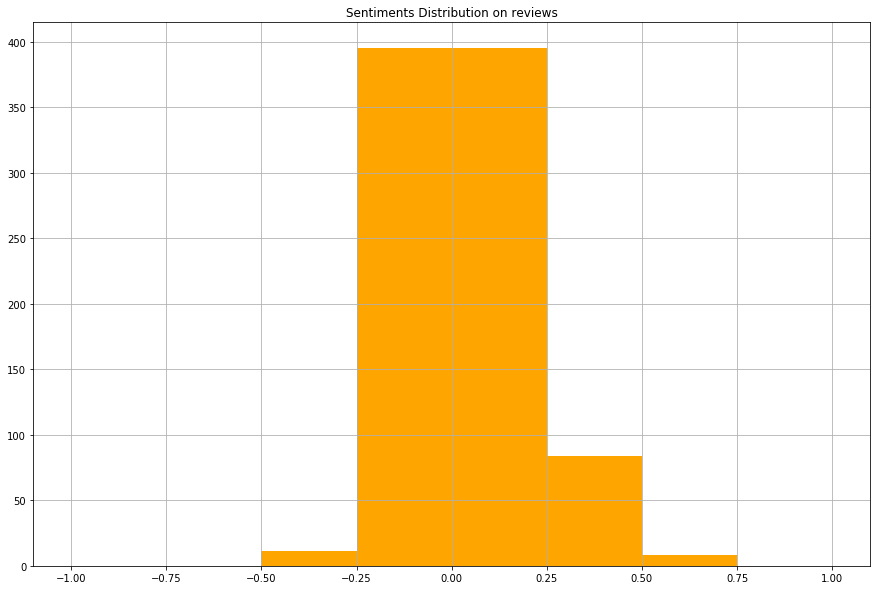

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='orange')
plt.title('Sentiments Distribution on reviews')
plt.show()

# Downloading the sentiments file as CSV for further review

In [0]:
sentiment_df.to_csv('sent_file1.csv') 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
